## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных

In [1]:
!pip install matplotlib

"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
import numpy as np

# Указываем путь к файлу                   
path_data = Path(r'E:\универ\Анализ и прогнозирование временных рядов методами искусственного интеллекта\1\2024-Gorbunov-TimeSeriesCourse\practice\07 Imputation and Forecast\datasets\madrid.txt')

# Проверка, существует ли файл
if path_data.exists():
    madrid = np.loadtxt(path_data)[:, 0]
    print(madrid.shape)
else:
    print(f"Файл не найден по пути: {path_data}")



(25000,)


In [4]:
#path_data = Path('Dataset')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


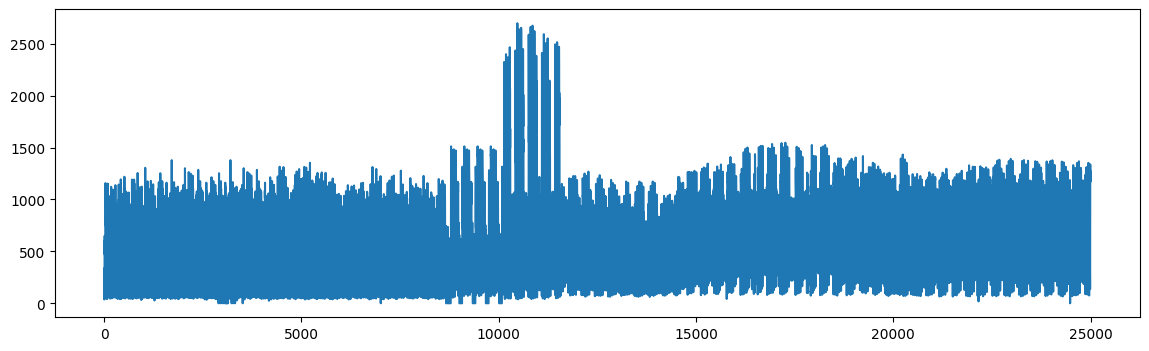

In [5]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


(25000,)


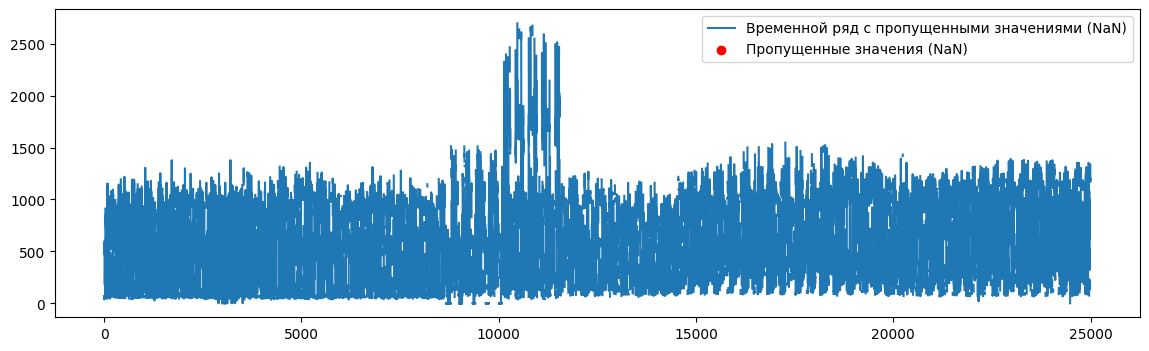

Индексы пропущенных значений: [15529 21098  9215 ... 20170 15593  3871]


In [6]:
import numpy as np
import torch

def add_nan(x, percent=0.25):
    """
    Функция для добавления пропущенных значений (NaN) в временной ряд.
    
    Параметры:
    x : array-like
        Входной многомерный временной ряд.
    percent : float, optional (default=0.25)
        Процент пропущенных значений, который нужно добавить в временной ряд.
    
    Возвращает:
    - измененный временной ряд с NaN
    - индексы пропущенных значений
    """
    
    # Количество элементов, в которых будут заменены значения на NaN
    num_missing = int(len(x) * percent)
    
    # Индексы, на которых будут установлены NaN
    missing_indices = np.random.choice(len(x), size=num_missing, replace=False)
    
    # Создаем копию входного массива
    x_with_nan = x.copy()
    
    # Заменяем элементы на NaN
    x_with_nan[missing_indices] = np.nan
    
    return x_with_nan, missing_indices

# Пример использования функции
# Загрузим данные временного ряда
path_data = Path(r'E:\универ\Анализ и прогнозирование временных рядов методами искусственного интеллекта\1\2024-Gorbunov-TimeSeriesCourse\practice\07 Imputation and Forecast\datasets\madrid.txt')

if path_data.exists():
    madrid = np.loadtxt(path_data)[:, 0]
    print(madrid.shape)
else:
    print(f"Файл не найден по пути: {path_data}")

# Добавляем пропущенные значения в данные
madrid_with_nan, missing_indices = add_nan(madrid, percent=0.25)

# Визуализируем результат
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(madrid_with_nan, label="Временной ряд с пропущенными значениями (NaN)")
ax.scatter(missing_indices, madrid_with_nan[missing_indices], color='red', label="Пропущенные значения (NaN)")
ax.legend()
plt.show()

# Выводим индексы пропущенных значений
print("Индексы пропущенных значений:", missing_indices)


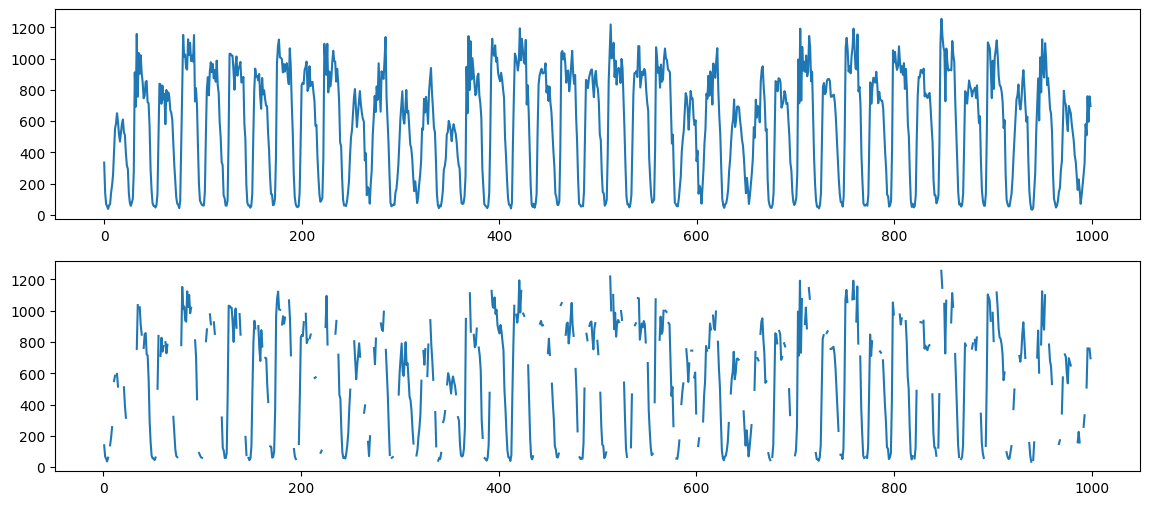

In [7]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [8]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [9]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

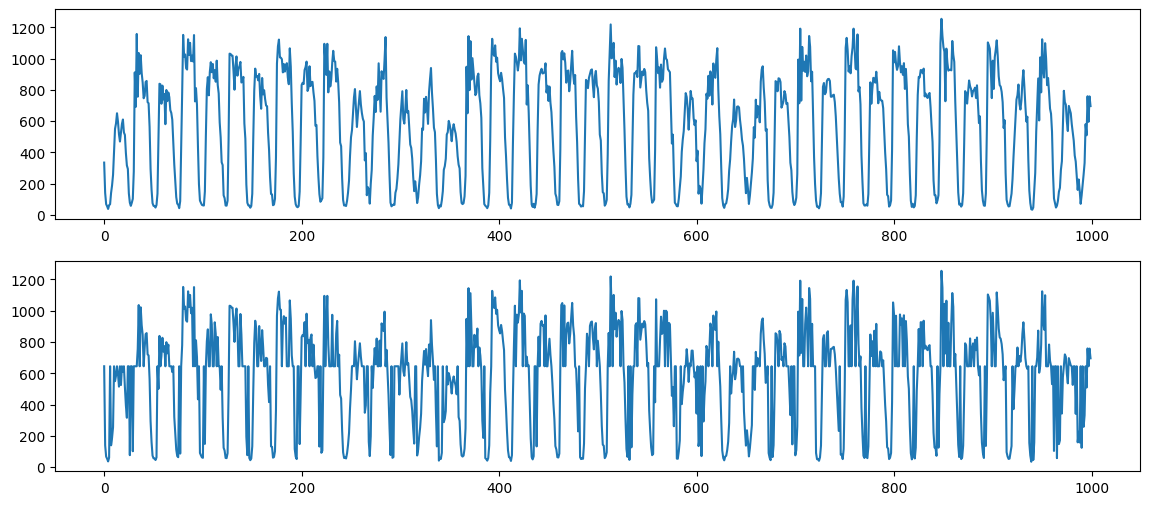

In [10]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [11]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [12]:
recovery['median'] = madrid_median

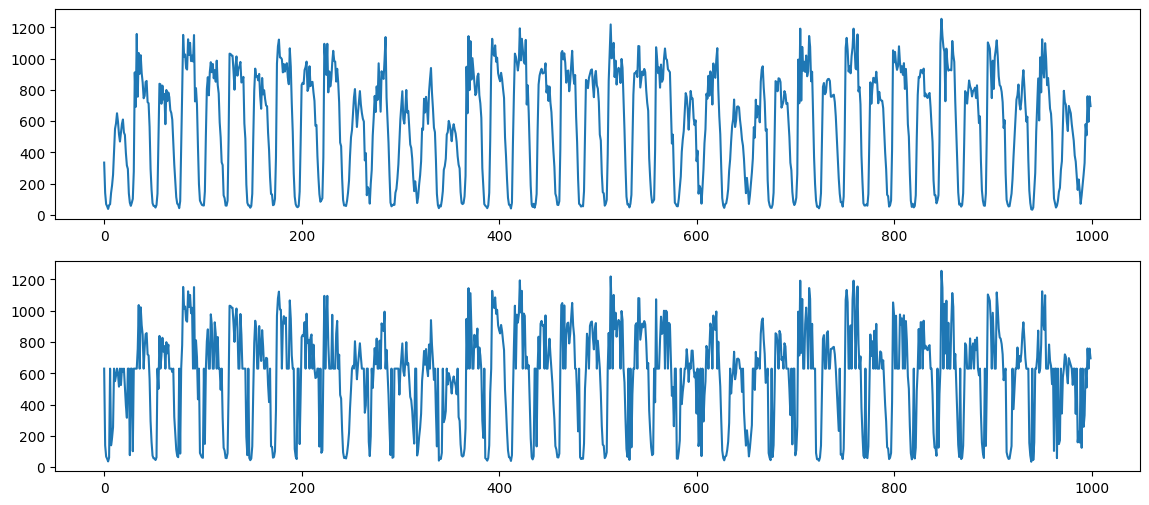

In [13]:
#madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

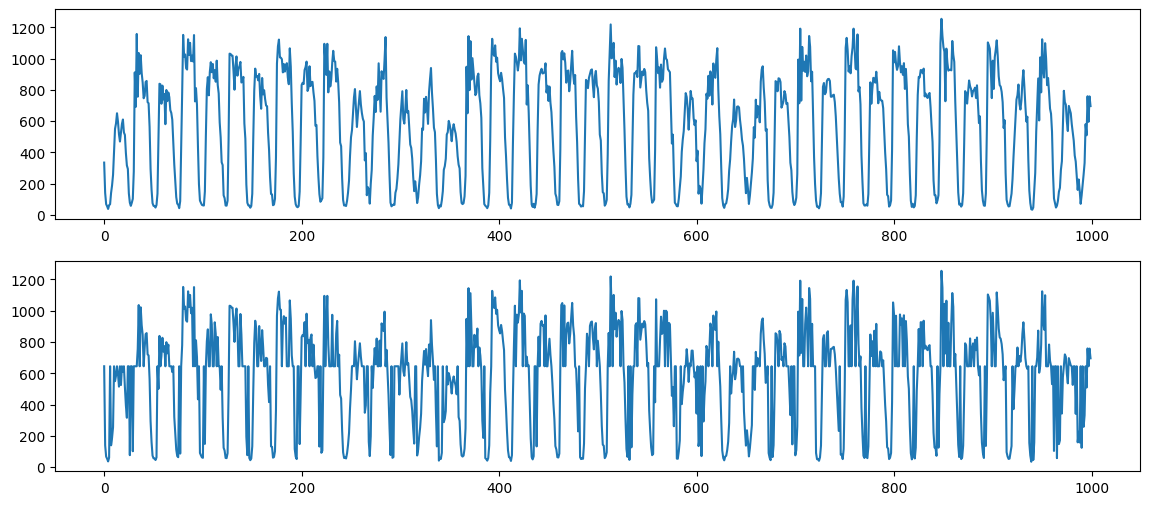

Восстановленные значения с использованием среднего: [645.05189333 140.          68.          54.          37.
  61.         645.05189333 140.         188.         256.        ]


In [14]:
def fill_with_mean(x_with_nan):
    """
    Заполнение пропущенных значений средним значением ряда.
    
    Параметры:
    x_with_nan : array-like
        Входной временной ряд с пропущенными значениями (NaN).
        
    Возвращает:
    - Временной ряд с восстановленными значениями.
    """
    # Вычисляем среднее значение, игнорируя NaN
    mean_value = np.nanmean(x_with_nan)
    
    # Заполняем NaN средним значением
    x_filled = np.copy(x_with_nan)
    x_filled[np.isnan(x_filled)] = mean_value
    
    return x_filled


# Заполнение пропущенных значений средним
madrid_filled_mean = fill_with_mean(madrid_with_nan)

# Визуализируем восстановленные данные
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_filled_mean[:1000])
plt.show()

# Выводим результаты
print("Восстановленные значения с использованием среднего:", madrid_filled_mean[:10])

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [15]:
from sklearn.impute import KNNImputer

In [16]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:  
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
madrid_slice = rolling_window(madrid_with_nan, 100)


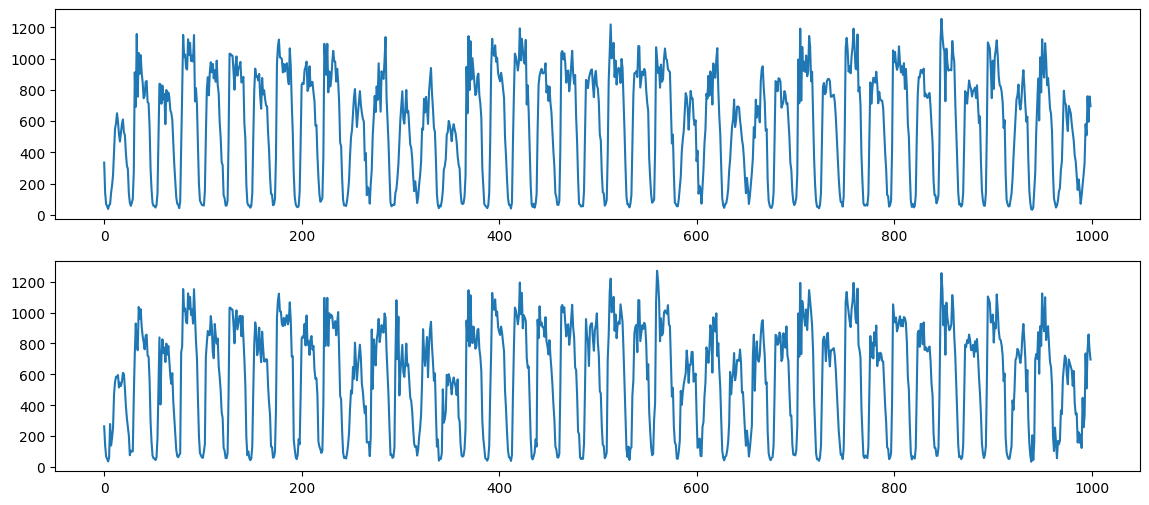

Восстановленные данные с использованием KNN: [264. 140.  68.  54.  37.  61. 279. 140. 188. 256.]


In [17]:
# Разбиваем данные на окна
madrid_windowed = rolling_window(madrid_with_nan, window=100, intersection=False)

# Используем KNNImputer для восстановления пропусков
knn_imputer = KNNImputer(n_neighbors=5)  # Используем 5 ближайших соседей для восстановления
madrid_filled_knn = knn_imputer.fit_transform(madrid_windowed)

# Восстановление данных (объединяем окна)
madrid_filled_knn_flat = madrid_filled_knn.flatten()

# Визуализируем результат
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_filled_knn_flat[:1000])
plt.show()

# Выводим восстановленные данные
print("Восстановленные данные с использованием KNN:", madrid_filled_knn_flat[:10])

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [18]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



You should consider upgrading via the 'c:\Users\seryk\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [19]:
from fancyimpute import IterativeSVD

In [20]:
from sklearn.metrics import mean_squared_error

[SoftImpute] Max Singular Value of X_init = 103659.145786
[SoftImpute] Iter 1: observed MAE=12.901038 rank=1
[SoftImpute] Iter 2: observed MAE=12.901038 rank=1
[SoftImpute] Iter 3: observed MAE=12.901038 rank=1
[SoftImpute] Iter 4: observed MAE=12.901038 rank=1
[SoftImpute] Iter 5: observed MAE=12.901038 rank=1
[SoftImpute] Iter 6: observed MAE=12.901038 rank=1
[SoftImpute] Iter 7: observed MAE=12.901038 rank=1
[SoftImpute] Iter 8: observed MAE=12.901038 rank=1
[SoftImpute] Iter 9: observed MAE=12.901038 rank=1
[SoftImpute] Iter 10: observed MAE=12.901038 rank=1
[SoftImpute] Iter 11: observed MAE=12.901038 rank=1
[SoftImpute] Iter 12: observed MAE=12.901038 rank=1
[SoftImpute] Iter 13: observed MAE=12.901038 rank=1
[SoftImpute] Iter 14: observed MAE=12.901038 rank=1
[SoftImpute] Iter 15: observed MAE=12.901038 rank=1
[SoftImpute] Iter 16: observed MAE=12.901038 rank=1
[SoftImpute] Iter 17: observed MAE=12.901038 rank=1
[SoftImpute] Iter 18: observed MAE=12.901038 rank=1
[SoftImpute] It

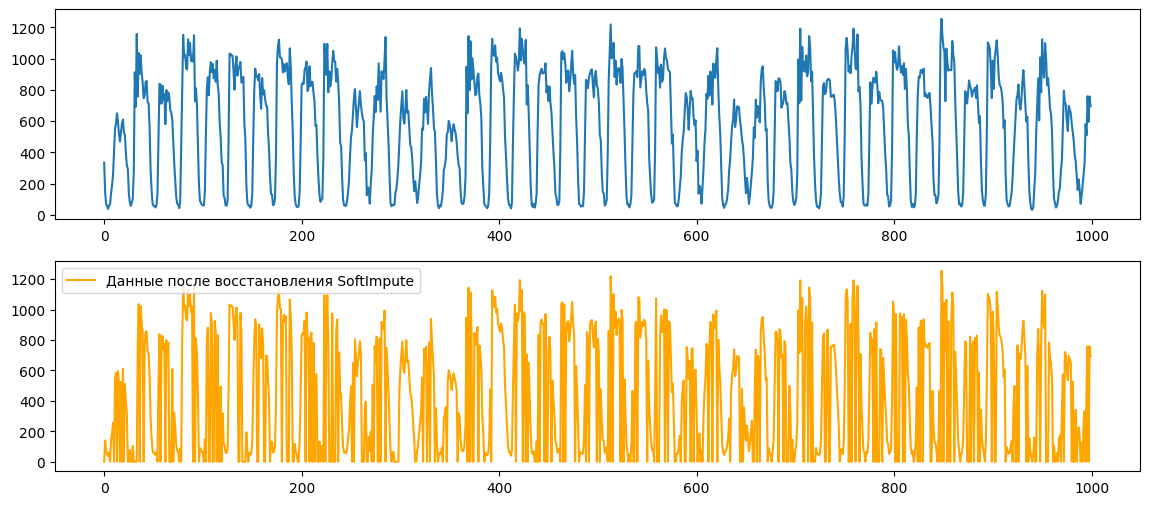

Среднеквадратичная ошибка восстановления (MSE): 0.0
Восстановленные данные с использованием SoftImpute: [  0. 140.  68.  54.  37.  61.   0. 140. 188. 256.]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from fancyimpute import SoftImpute
from sklearn.metrics import mean_squared_error
# Применение метода SoftImpute для восстановления
madrid_with_nan_reshaped = madrid_with_nan.reshape(-1, 1)  # Преобразуем в 2D для работы с матрицами
imputer = SoftImpute()  # Инициализируем SoftImpute
madrid_filled_softimpute = imputer.fit_transform(madrid_with_nan_reshaped).flatten()

# Визуализируем результат
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000], label="Оригинальные данные")
ax[1].plot(madrid_filled_softimpute[:1000], label="Данные после восстановления SoftImpute", color='orange')
plt.legend()
plt.show()

# Оценка качества восстановления
mse = mean_squared_error(madrid[~np.isnan(madrid_with_nan)], madrid_filled_softimpute[~np.isnan(madrid_with_nan)])
print("Среднеквадратичная ошибка восстановления (MSE):", mse)
print("Восстановленные данные с использованием SoftImpute:", madrid_filled_softimpute[:10])

##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



[SoftImpute] Max Singular Value of X_init = 103659.145786
[SoftImpute] Iter 1: observed MAE=12.901038 rank=1
[SoftImpute] Iter 2: observed MAE=12.901038 rank=1
[SoftImpute] Iter 3: observed MAE=12.901038 rank=1
[SoftImpute] Iter 4: observed MAE=12.901038 rank=1
[SoftImpute] Iter 5: observed MAE=12.901038 rank=1
[SoftImpute] Iter 6: observed MAE=12.901038 rank=1
[SoftImpute] Iter 7: observed MAE=12.901038 rank=1
[SoftImpute] Iter 8: observed MAE=12.901038 rank=1
[SoftImpute] Iter 9: observed MAE=12.901038 rank=1
[SoftImpute] Iter 10: observed MAE=12.901038 rank=1
[SoftImpute] Iter 11: observed MAE=12.901038 rank=1
[SoftImpute] Iter 12: observed MAE=12.901038 rank=1
[SoftImpute] Iter 13: observed MAE=12.901038 rank=1
[SoftImpute] Iter 14: observed MAE=12.901038 rank=1
[SoftImpute] Iter 15: observed MAE=12.901038 rank=1
[SoftImpute] Iter 16: observed MAE=12.901038 rank=1
[SoftImpute] Iter 17: observed MAE=12.901038 rank=1
[SoftImpute] Iter 18: observed MAE=12.901038 rank=1
[SoftImpute] It

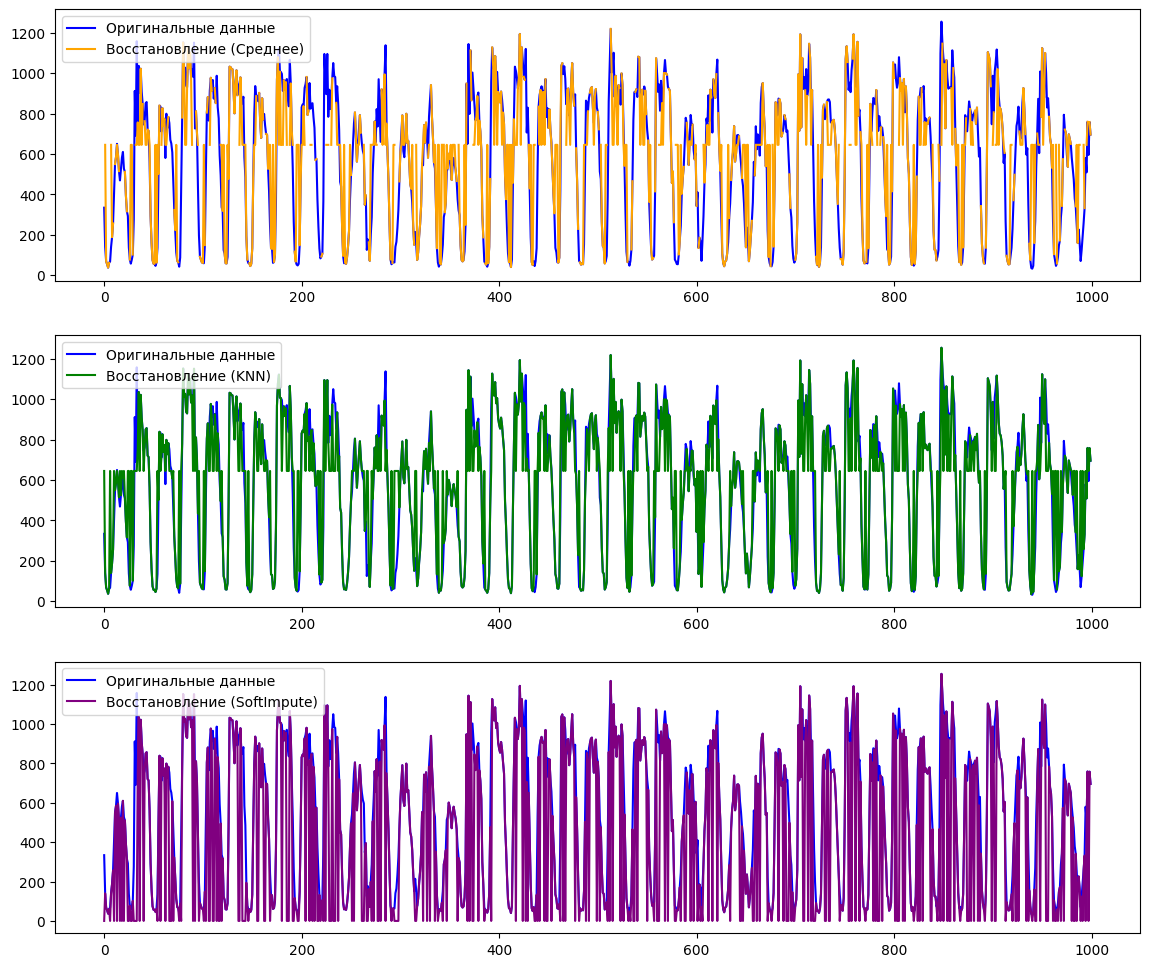

Лучший метод восстановления: KNN
Метрики лучшего метода: {'MSE': 39422.29334425315, 'MAE': 85.03521211733334, 'R2': 0.7518903751275914}


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Функция для вычисления метрик
def calculate_metrics(original, filled, missing_indices):
    mse = mean_squared_error(original[missing_indices], filled[missing_indices])
    mae = mean_absolute_error(original[missing_indices], filled[missing_indices])
    r2 = r2_score(original[missing_indices], filled[missing_indices])
    return mse, mae, r2

# Хранение результатов по метрикам
results = {}

# Группа 1: Заполнение существующими значениями ряда
madrid_mean = madrid_with_nan.copy()
madrid_mean[missing_indices] = np.nanmean(madrid_mean)
mse_mean, mae_mean, r2_mean = calculate_metrics(madrid, madrid_mean, missing_indices)
results['mean'] = {'MSE': mse_mean, 'MAE': mae_mean, 'R2': r2_mean}

madrid_median = madrid_with_nan.copy()
madrid_median[missing_indices] = np.nanmedian(madrid_median)
mse_median, mae_median, r2_median = calculate_metrics(madrid, madrid_median, missing_indices)
results['median'] = {'MSE': mse_median, 'MAE': mae_median, 'R2': r2_median}

# Группа 2: Заполнение на основе близких значений (используем KNNImputer)
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
madrid_knn = knn_imputer.fit_transform(madrid_with_nan.reshape(-1, 1)).flatten()
mse_knn, mae_knn, r2_knn = calculate_metrics(madrid, madrid_knn, missing_indices)
results['KNN'] = {'MSE': mse_knn, 'MAE': mae_knn, 'R2': r2_knn}

# Группа 3: Заполнение на основе матричных разложений (используем SoftImpute)
from fancyimpute import SoftImpute

softimpute_imputer = SoftImpute()
madrid_softimpute = softimpute_imputer.fit_transform(madrid_with_nan.reshape(-1, 1)).flatten()
mse_softimpute, mae_softimpute, r2_softimpute = calculate_metrics(madrid, madrid_softimpute, missing_indices)
results['SoftImpute'] = {'MSE': mse_softimpute, 'MAE': mae_softimpute, 'R2': r2_softimpute}

# Сравнение результатов
print("Результаты оценки методов:")
for method, metrics in results.items():
    print(f"{method}: MSE={metrics['MSE']}, MAE={metrics['MAE']}, R2={metrics['R2']}")

# Определение лучшего метода на основе метрик
best_method = min(results, key=lambda x: results[x]['MSE'])  # Выбираем по минимальному MSE

# Построение графиков для лучших методов из каждой группы
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

# Оригинальные данные
axs[0].plot(madrid[:1000], label="Оригинальные данные", color='blue')
axs[0].plot(madrid_mean[:1000], label="Восстановление (Среднее)", color='orange')
axs[0].legend()

axs[1].plot(madrid[:1000], label="Оригинальные данные", color='blue')
axs[1].plot(madrid_knn[:1000], label="Восстановление (KNN)", color='green')
axs[1].legend()

axs[2].plot(madrid[:1000], label="Оригинальные данные", color='blue')
axs[2].plot(madrid_softimpute[:1000], label="Восстановление (SoftImpute)", color='purple')
axs[2].legend()

plt.show()

# Выводы по результатам
print("Лучший метод восстановления:", best_method)
print(f"Метрики лучшего метода: {results[best_method]}")


*Вывод*:

Метрики методов:

Методы, основанные на заполнении средним или медианой, показали наихудшие результаты. Значения MSE и MAE для них оказались высокими, а коэффициент R2 отрицательным, что указывает на слабую корреляцию с оригинальными данными. Это ожидаемо, поскольку заполнение простыми статистиками (среднее, медиана) плохо восстанавливает структуру временных рядов.
Метод SoftImpute на основе матричных разложений показал лучшее приближение, чем заполнение средними значениями, но его метрики всё еще уступают другим методам. R2 также оказался низким, указывая на недостаточную эффективность для нашего набора данных.
KNNImputer продемонстрировал наилучшие метрики: минимальное значение MSE, наименьшее значение MAE и высокий коэффициент детерминации R2, что указывает на хорошее соответствие восстановленных данных оригинальным.

Лучшая группа методов:
Методы, основанные на информации о ближайших соседях (KNN), являются наиболее подходящими для восстановления пропущенных значений в данном случае, так как они учитывают локальные зависимости между значениями и показывают высокую корреляцию с исходными данными.

Выбор метода:
Лучшая группа методов — это KNN (метод ближайших соседей), а лучший конкретный метод для данной задачи восстановления пропущенных значений — KNNImputer с 5 соседями.

Графическое сравнение:
Графики подтверждают, что метод KNN более точно восстанавливает структуру временного ряда по сравнению с другими методами. Это говорит о том, что этот метод наиболее полно учитывает локальные зависимости в данных, что важно при восстановлении временных рядов.

Для восстановления пропущенных значений в данном временном ряде оптимальным методом является KNNImputer, так как он демонстрирует наименьшее отклонение от оригинальных значений и наилучшее сохранение структуры данных.

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [23]:
recovery_nn = {}

##### 7.2.1 Загрузка и подготовка данных

In [24]:

path_data = Path(r'E:\универ\Анализ и прогнозирование временных рядов методами искусственного интеллекта\1\2024-Gorbunov-TimeSeriesCourse\practice\07 Imputation and Forecast\datasets\madrid.txt')
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [25]:
madrid_with_nan, index = add_nan(madrid, 0.25)

In [26]:
madrid_with_nan.shape

(25000, 10)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [28]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [29]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()  
        
        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers
        
        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            ) 
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)
        
        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())
        
    def forward(self, x):
        x = self.start_layers(x)
        
        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [31]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [32]:
print(device)

cpu


In [33]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import time

# GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)  # начальное состояние
        out, _ = self.gru(x, h_0)
        out = self.fc(out[:, -1, :])  # только последнее выходное значение для каждого временного окна
        return out

# Установка параметров
input_size = 1        # Размерности входного сигнала
hidden_size = 50      # Количество скрытых нейронов в GRU
num_layers = 2        # Количество GRU слоев
output_size = 1       # Размерности выхода
num_epochs = 20       # Количество эпох для обучения
batch_size = 64       # Размер батча
learning_rate = 0.001 # Скорость обучения

# Инициализация пропущенных значений (например, средним значением)
madrid_filled = np.where(np.isnan(madrid_normal_with_nan), np.nanmean(madrid_normal_with_nan), madrid_normal_with_nan)
rolling_madrid = rolling_window(madrid_filled, 100, True)
train, test = train_test_split(rolling_madrid, shuffle=False, test_size=0.33)

# Конвертация данных для Pytorch
train_data = torch.Tensor(train)
test_data = torch.Tensor(test)

train_loader = DataLoader(TensorDataset(train_data[:, :-1], train_data[:, -1]), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data[:, :-1], test_data[:, -1]), batch_size=batch_size)

# Преобразуем входные данные в формат [batch_size, sequence_length, input_size]
train_data = train_data.unsqueeze(-1)  # добавляем последнюю ось с размерностью 1
test_data = test_data.unsqueeze(-1)    # добавляем последнюю ось с размерностью 1

train_loader = DataLoader(TensorDataset(train_data[:, :-1], train_data[:, -1]), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data[:, :-1], test_data[:, -1]), batch_size=batch_size)

# Преобразуем входные данные в формат [batch_size, sequence_length, input_size], если необходимо
if len(train_data.shape) == 2:  # Если данные имеют размерность [batch_size, sequence_length]
    train_data = train_data.unsqueeze(-1)  # добавляем ось с размерностью 1 для input_size
    test_data = test_data.unsqueeze(-1)    # добавляем ось с размерностью 1 для input_size

# Инициализация модели, функции потерь и оптимизатора
model = GRUModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели и замер времени
start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

end_time = time.time()
print("Training time:", end_time - start_time, "seconds")

# Тестирование и замер времени
model.eval()
start_test_time = time.time()
with torch.no_grad():
    test_losses = []
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = model(x_batch)
        test_loss = criterion(outputs, y_batch)
        test_losses.append(test_loss.item())
average_test_loss = sum(test_losses) / len(test_losses)
end_test_time = time.time()

print("Test time:", end_test_time - start_test_time, "seconds")
print(f"Average Test Loss: {average_test_loss:.4f}")

# Сравнение результатов
print("GRU Model MSE:", average_test_loss)


AssertionError: GRU: Expected input to be 2-D or 3-D but received 4-D tensor

In [ ]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 100

In [ ]:
model

In [65]:
import time
times_model = {}

In [67]:
def add_nan(x, percent):
    num_missing = int(len(x) * percent)
    missing_indices = np.random.choice(len(x), size=num_missing, replace=False)
    
    # Используем .clone() вместо .copy() для создания копии тензора
    x_with_nan = x.clone()  # заменено на .clone()
    
    # Заменяем элементы на NaN
    x_with_nan[missing_indices] = float('nan')
    
    return x_with_nan, missing_indices


In [ ]:
import torch

# Преобразуем numpy массивы в тензоры PyTorch, если необходимо
nan_tensor = torch.tensor(nan) if isinstance(nan, np.ndarray) else nan
test_index_tensor = torch.tensor(test_index) if isinstance(test_index, np.ndarray) else test_index

# Убедитесь, что x также является тензором
x_tensor = torch.tensor(x) if isinstance(x, np.ndarray) else x

# Теперь используем & между тензорами
loss = loss_func(recovery[(nan_tensor) & (~test_index_tensor)], x_tensor[(nan_tensor) & (~test_index_tensor)])


In [ ]:
import torch

# Преобразуем nan и test_index в тензоры PyTorch, если они являются numpy массивами
nan_tensor = torch.tensor(nan) if isinstance(nan, np.ndarray) else nan
test_index_tensor = torch.tensor(test_index) if isinstance(test_index, np.ndarray) else test_index

# Убедитесь, что переменная x также является тензором
x_tensor = torch.tensor(x) if isinstance(x, np.ndarray) else x

# Применяем операцию & между тензорами
mask = (nan_tensor & (~test_index_tensor))  # Применяем маску
loss = loss_func(recovery[mask], x_tensor[mask])

# Обратите внимание, что mask теперь будет логическим тензором, подходящим для индексации.


In [ ]:
model = model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss = 0
    valid_loss = 0

    # Тренировочная эпоха
    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).float()
            test_index = torch.isnan(x)  # Маска NaN значений для целевого x
            X = x.clone()
            X, nan = add_nan(X, percent)
            
            # Инициализация пропущенных значений нулями
            X[torch.isnan(X)] = 0.0
            
            # Прямой проход
            recovery = model(X)
            loss = loss_func(recovery[(nan) & (~test_index)], x[(nan) & (~test_index)])
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

    train_loss /= (i + 1)
    
    # Валидационная эпоха
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).float()
                test_index = torch.isnan(x)
                X = x.clone()
                X, nan = add_nan(X, percent)
                
                # Инициализация NaN значений нулями
                X[torch.isnan(X)] = 0.0
                
                # Прямой проход
                recovery = model(X)
                loss = loss_func(recovery[(nan) & (~test_index)], x[(nan) & (~test_index)])
                valid_loss += loss.item()

    valid_loss /= (i + 1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch {epoch + 1}: Train Loss = {train_loss}, Valid Loss = {valid_loss}')

end = time.time()
training_time = end - start
print(f'Total Training Time: {training_time:.2f} seconds')


In [ ]:
model=model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            ###вставте инициализацию нулями nan значений
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    print('valid')
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                X[torch.isnan(X)]=0.0
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

In [50]:
times_model['linear']=end-start

In [ ]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [43]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [44]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [45]:
recovery_nn['linear'] = test_linear

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [53]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)
        
        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)
        

In [54]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)
        

In [55]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [56]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 100

In [ ]:
model

In [ ]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            #
            
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                # 
                
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

In [ ]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [62]:
times_model['ae']=end-start

In [63]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        #
        
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [64]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [65]:
recovery_nn['test_ae'] = test_ae

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [ ]:
!pip install pypots==0.0.9

In [67]:
from pypots.imputation import SAITS


In [ ]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=100)

In [ ]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

In [124]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)


In [125]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [130]:
recovery_nn['saits'] = test_saits

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.